# Machine Learning

Code curated by: Shawhin Talebi <\br>
Source: https://fluxml.ai/Flux.jl/stable/models/overview/

### Load Package
Note: Make sure you first install the Flux.jl and Plots.jl packages

In [1]:
using Flux
using Plots

### Set-up Artificial Prediction Problem

In [2]:
# artificial target
target(x) = 4x + 2

# define training and testing data
x_train, x_test = hcat(0:2:10...), hcat(1:2:11...)
y_train, y_test = target.(x_train), target.(x_test);

### Setup Model

In [16]:
# create a dense layer with 1 input and 1 output i.e. output = σ.(m * input + b), where σ = identity, m = linear coefficent, and b = offset/bias
# notice: 1 layer neural net with identity activation is just linear regression
model = Dense(1, 1)

# model is randomly initialized, so let's print the internal parameters
println("weight: ", model.weight)
println("bias: ", model.bias)

weight: Float32[0.99372494]
bias: Float32[0.0]


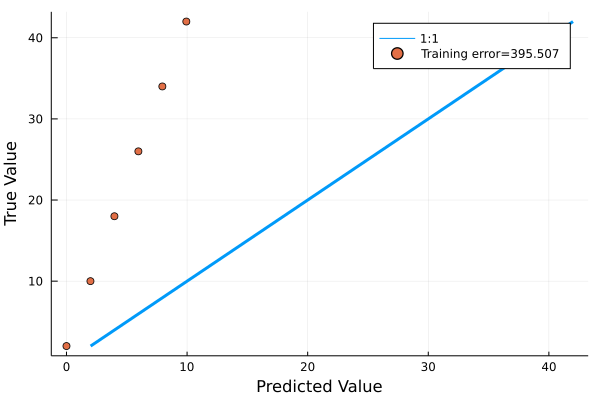

In [17]:
# make a prediction with the untrained model
y_train_predicted = model(x_train)

# compute mean square error between prediction and truth
mse(y1, y2) = sum((y1-y2).^2)/length(y1)
err = mse(y_train_predicted, y_train)

# plot results
plot(y_train', y_train', lw = 3, label = "1:1")
scatter!(y_train_predicted', y_train', lw = 3, label = string("Training error=",  round(err, digits=3)))
xlabel!("Predicted Value")
ylabel!("True Value")

### Train Model

In [18]:
using Flux: train!

# define a loss function, say mean sqare error
loss(x, y) = Flux.Losses.mse(model(x), y)

# choose an optimizer
opt = Descent()

# define training data
data = [(x_train, y_train)]

# grab model parameters
parameters = params(model)

# train model (1 epoch)
train!(loss, parameters, data, opt)

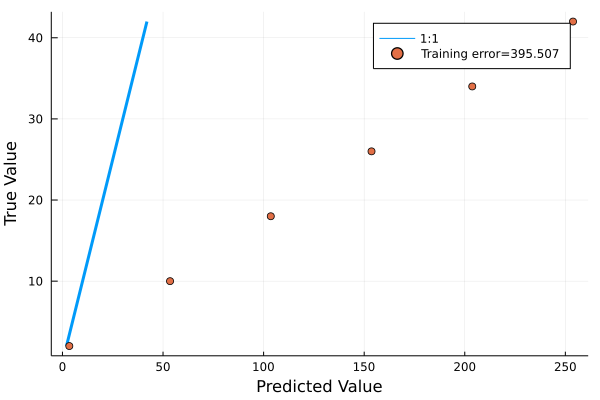

In [19]:
# plot results
plot(y_train', y_train', lw = 3, label = "1:1")
scatter!(model(x_train)', y_train', lw = 3, label = string("Training error=",  round(err, digits=3)))
xlabel!("Predicted Value")
ylabel!("True Value")

In [20]:
for epoch in 1:200
    
    train!(loss, parameters, data, opt)

end

In [21]:
model.weight

1×1 Matrix{Float32}:
 NaN